In [2]:
import numpy as nmp
import pandas as pad

In [3]:
dfn = pad.read_csv('spam.csv', encoding='latin-1')

In [4]:
dfn.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1532,legitime,Unfortunately i've just found out that we have...,NaN,NaN,NaN
3627,legitime,Meeting u is my work. . . Tel me when shall i ...,NaN,NaN,NaN
4566,legitime,But you were together so you should be thinkin...,NaN,NaN,NaN
1517,spam,Our brand new mobile music service is now live...,NaN,NaN,NaN
862,legitime,"Sorry, I guess whenever I can get a hold of my...",NaN,NaN,NaN
5347,legitime,No sir. That's why i had an 8-hr trip on the b...,NaN,NaN,NaN
1168,legitime,Ok . . now i am in bus. . If i come soon i wil...,NaN,NaN,NaN


In [5]:
dfn.shape

(5569, 5)

In [8]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5569 non-null   object
 1   v2          5569 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [6]:
dfn.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
dfn.sample(3)

,v1,v2
2685,spam,URGENT! We are trying to contact U. Todays dra...
3375,legitime,"Good afternon, my love. How are today? I hope ..."
5053,spam,Double Mins & Double Txt & 1/2 price Linerenta...


In [8]:
dfn.rename(columns={'v1':'Lloji','v2':'Tekst'},inplace=True)
dfn.sample(2)

,Lloji,Tekst
1102,legitime,Black shirt n blue jeans... I thk i c Ì_...
1710,legitime,"(No promises on when though, haven't even gott..."


In [20]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()

In [21]:
dfn['Lloji'] = coder.fit_transform(dfn['Lloji'])

In [22]:
dfn.sample(3)

,Lloji,Tekst,Nr.karaktereve,Nr.fjalëve,Nr.fjalive
1496,0,I'm always on yahoo messenger now. Just send t...,158,38,3
3114,0,I wait 4 Ì_ inside da car park...,33,9,1
1531,0,Oh dang! I didn't mean o send that to you! Lol!,47,15,3


In [11]:
dfn.duplicated().sum()

403

In [12]:
dfn = dfn.drop_duplicates(keep='first')

In [13]:
dfn.duplicated().sum()

0

In [14]:
dfn['Lloji'].value_counts()

Lloji
legitime    4513
spam         653
Name: count, dtype: int64

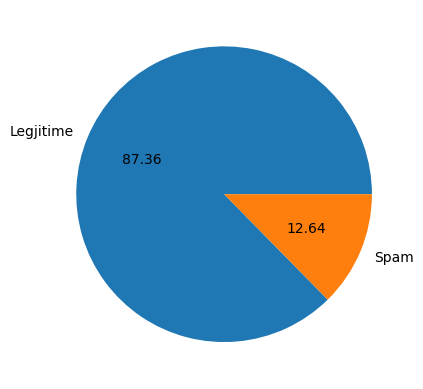

In [15]:
import matplotlib.pyplot as mplto
mplto.pie(dfn['Lloji'].value_counts(), labels=['Legjitime','Spam'],autopct="%0.2f")
mplto.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
dfn['Nr.karaktereve'] = dfn['Tekst'].apply(len)
dfn['Nr.fjalëve'] = dfn['Tekst'].apply(lambda x:len(nltk.word_tokenize(x)))


In [18]:
dfn['Nr.fjalive'] = dfn['Tekst'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
dfn.sample(4)

,Lloji,Tekst,Nr.karaktereve,Nr.fjalëve,Nr.fjalive
5486,0,Ofcourse I also upload some songs,33,6,1
4834,0,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I...",121,31,3
1173,0,ÌÏ dun need to pick ur gf?,26,8,1
2067,0,Who's there say hi to our drugdealer,36,8,1


In [24]:
# legitime
dfn[dfn['Lloji'] == 0][['Nr.karaktereve','Nr.fjalëve','Nr.fjalive']].describe()

,Nr.karaktereve,Nr.fjalëve,Nr.fjalive
count,4513.000000,4513.000000,4513.000000
mean,70.489696,17.125637,1.820297
std,56.379476,13.496271,1.384058
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
dfn[dfn['Lloji'] == 1][['Nr.karaktereve','Nr.fjalëve','Nr.fjalive']].describe()

,Nr.karaktereve,Nr.fjalëve,Nr.fjalive
count,653.000000,653.000000,653.000000
mean,137.921899,27.667688,2.970904
std,30.154383,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sear

<Axes: xlabel='Nr.karaktereve', ylabel='Count'>

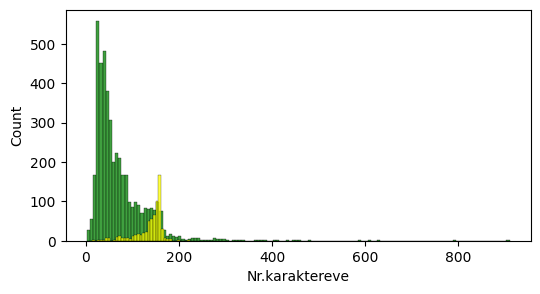

In [27]:
mplto.figure(figsize=(6,3))
sear.histplot(dfn[dfn['Lloji'] == 0]['Nr.karaktereve'],color='green')
sear.histplot(dfn[dfn['Lloji'] == 1]['Nr.karaktereve'],color='yellow')

<Axes: xlabel='Nr.fjalëve', ylabel='Count'>

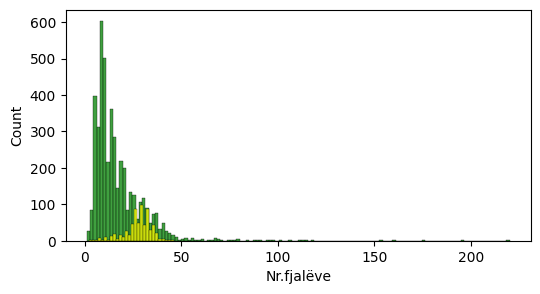

In [29]:
mplto.figure(figsize=(6,3))
sear.histplot(dfn[dfn['Lloji'] == 0]['Nr.fjalëve'],color='green')
sear.histplot(dfn[dfn['Lloji'] == 1]['Nr.fjalëve'],color='yellow')

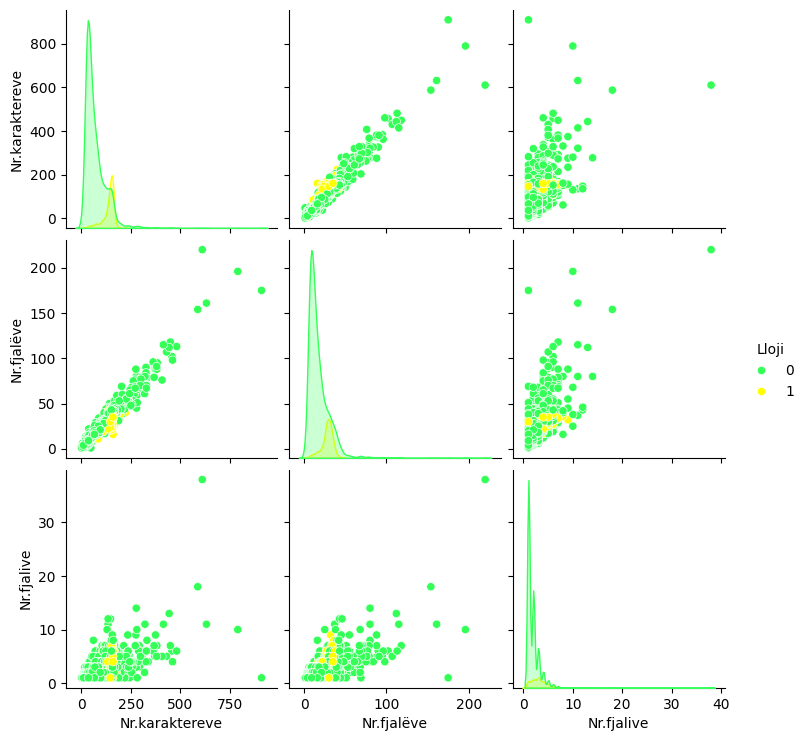

In [30]:
color_palette = {0: "#33FF57", 1: "#FFFF00"}
sear.pairplot(dfn, hue='Lloji', palette=color_palette)

In [ ]:
#DATA PROCESSING

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import string
from nltk.corpus import stopwords

In [33]:
def transform_text(Tekst):
    Tekst = Tekst.lower()
    Tekst = nltk.word_tokenize(Tekst)
    
    a = []
    for i in Tekst:
        if i.isalnum():
            a.append(i)
    
    Tekst = a[:]
    a.clear()
    
    for i in Tekst:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
            
    Tekst = a[:]
    a.clear()
    
    for i in Tekst:
        a.append(ps.stem(i))
    
            
    return " ".join(a)

In [38]:
transform_text('I\x89Û÷m going to try for 2 months ha ha only joking')

'go tri 2 month ha ha joke'

In [35]:
dfn['Tekst'][21]

'I\x89Û÷m going to try for 2 months ha ha only joking'

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [37]:
dfn['Teksti_transformuar'] = dfn['Tekst'].apply(transform_text)

In [39]:
dfn.head()

,Lloji,Tekst,Nr.karaktereve,Nr.fjalëve,Nr.fjalive,Teksti_transformuar
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wocl = WordCloud(width=400,height=400,min_font_size=10,background_color='grey')

In [41]:
spam_wocl = wocl.generate(dfn[dfn['Lloji'] == 1]['Teksti_transformuar'].str.cat(sep=" "))

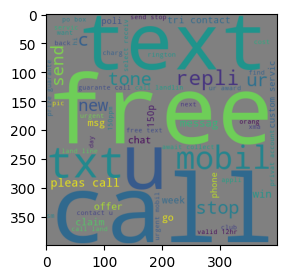

In [42]:
mplto.figure(figsize=(10,3))
mplto.imshow(spam_wocl)

In [43]:
legjitime_wocl = wocl.generate(dfn[dfn['Lloji'] == 0]['Teksti_transformuar'].str.cat(sep=" "))

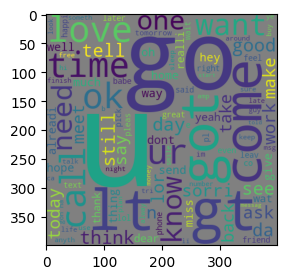

In [44]:
mplto.figure(figsize=(10,3))
mplto.imshow(legjitime_wocl)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cve = CountVectorizer()
tfidfv = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidfv.fit_transform(dfn['Teksti_transformuar']).toarray()

In [47]:
X.shape

(5166, 3000)

In [48]:
a = dfn['Lloji'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,a_train,a_test = train_test_split(X,a,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
ganb = GaussianNB()
munb = MultinomialNB()
benb = BernoulliNB()

In [53]:
ganb.fit(X_train,a_train)
a_pred1 = ganb.predict(X_test)
print(accuracy_score(a_test,a_pred1))
print(confusion_matrix(a_test,a_pred1))

0.8626692456479691
[[779 120]
 [ 22 113]]


In [54]:
munb.fit(X_train,a_train)
a_pred2 = munb.predict(X_test)
print(accuracy_score(a_test,a_pred2))
print(confusion_matrix(a_test,a_pred2))
print(precision_score(a_test,a_pred2))

0.9758220502901354
[[899   0]
 [ 25 110]]
1.0


In [55]:
benb.fit(X_train,a_train)
a_pred3 = benb.predict(X_test)
print(accuracy_score(a_test,a_pred3))
print(confusion_matrix(a_test,a_pred3))
print(precision_score(a_test,a_pred3))

0.9806576402321083
[[896   3]
 [ 17 118]]
0.9752066115702479


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
munb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [58]:
classifie = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': munb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbc
    
}

In [59]:
def training_classifier(clf,X_train,a_train,X_test,a_test):
    clf.fit(X_train,a_train)
    a_pred = clf.predict(X_test)
    accuracy = accuracy_score(a_test,a_pred)
    precision = precision_score(a_test,a_pred)
    
    return accuracy,precision

In [60]:
training_classifier(svc,X_train,a_train,X_test,a_test)

(0.971953578336557, 0.9818181818181818)

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in classifie.items():
    
    current_accuracy,current_precision = training_classifier(clf, X_train,a_train,X_test,a_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9818181818181818
For  KN
Accuracy -  0.9110251450676983
Precision -  0.9777777777777777
For  NB
Accuracy -  0.9758220502901354
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8018867924528302
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9484536082474226
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9351851851851852
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8492063492063492
For  ETC
Accuracy -  0.9806576402321083
Precision -  1.0
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9278350515463918


In [62]:
perform_dfn = pad.DataFrame({'Algoritmi':classifie.keys(),'Saktësia':accuracy_scores,'Precizioni':precision_scores})

In [63]:
perform_dfn

,Algoritmi,Saktësia,Precizioni
0,SVC,0.971954,0.981818
1,KN,0.911025,0.977778
2,NB,0.975822,1.000000
3,DT,0.931335,0.801887
4,LR,0.953578,0.948454
5,RF,0.973888,1.000000
6,AdaBoost,0.960348,0.935185
7,BgC,0.954545,0.849206
8,ETC,0.980658,1.000000
9,GBDT,0.949710,0.927835


In [64]:
perform_dfn1 = pad.melt(perform_dfn, id_vars = "Algoritmi")

In [65]:
perform_dfn1

,Algoritmi,variable,value
0,SVC,Saktësia,0.971954
1,KN,Saktësia,0.911025
2,NB,Saktësia,0.975822
3,DT,Saktësia,0.931335
4,LR,Saktësia,0.953578
5,RF,Saktësia,0.973888
6,AdaBoost,Saktësia,0.960348
7,BgC,Saktësia,0.954545
8,ETC,Saktësia,0.980658
9,GBDT,Saktësia,0.949710


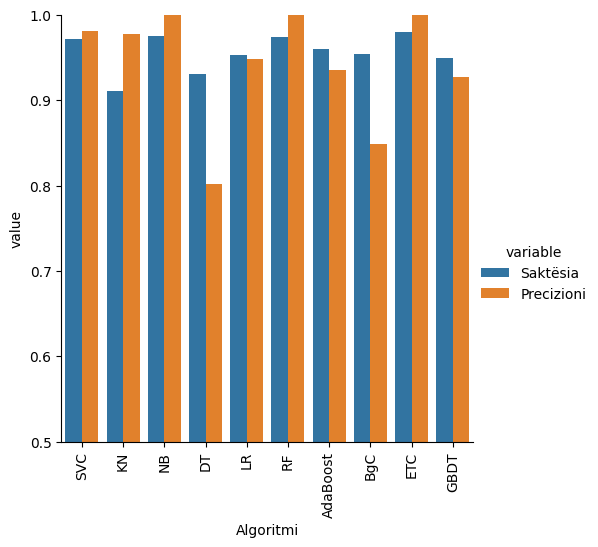

In [66]:
sear.catplot(x = 'Algoritmi', y='value', 
               hue = 'variable',data=perform_dfn1, kind='bar',height=5)
mplto.ylim(0.5,1.0)
mplto.xticks(rotation='vertical')
mplto.show()

In [67]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
munb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [68]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', munb), ('et', etc)],voting='soft')

In [69]:
voting.fit(X_train,a_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [80]:
a_predict = voting.predict(X_test)
print("Accuracy",accuracy_score(a_test,a_predict))
print("Precision",precision_score(a_test,a_predict))

Accuracy 0.9825918762088974
Precision 1.0


In [70]:
# Applying stacking
est=[('svm', svc), ('nb', munb), ('et', etc)]
final_est=RandomForestClassifier()

In [71]:
from sklearn.ensemble import StackingClassifier

In [72]:
clf = StackingClassifier(estimators=est, final_estimator=final_est)

In [73]:
clf.fit(X_train,a_train)
a_predict = clf.predict(X_test)
print("Accuracy",accuracy_score(a_test,a_predict))
print("Precision",precision_score(a_test,a_predict))

Accuracy 0.9845261121856866
Precision 0.983739837398374


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))